### RNN Stock Price Prediction

In [1]:
import pandas as pd

df_train = pd.read_csv("datasets/Google_Stock_Price_Train.csv")
df_test = pd.read_csv("datasets/Google_Stock_Price_Test.csv")
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [2]:
data_concat = pd.concat((df_train["Open"], df_test["Open"]), axis=0).values

data_concat = data_concat.reshape(-1, 1)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((0, 1))

data_scaled = scaler.fit_transform(data_concat)

In [4]:
import numpy as np

# Generate data such that x gets previous 60 data points (2 months)
# and y gets the 61th data point

x = []
y = []

for idx in range(61, data_scaled.shape[0]):
    x.append(data_scaled[idx-61:idx-1, 0]) 
    y.append(data_scaled[idx, 0])

x = np.array(x)
y = np.array(y)

x.shape

(1217, 60)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Reshape x_train from 2D to 3D as required by LSTM layer (batch_size, timestep, input_dim)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Sequential model with 1 input layer, 7 hidden layers, output layer
# LSTM = Long Short Term Memory, learns long term dependencies between time steps in sequence
# Dropout = Randomly dropout selected neurons to prevent overfitting, based on rate parameter

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_absolute_error")

In [7]:
model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=0)

In [8]:
y_pred = model.predict(x_test)

4/4 [==============================] - 1s 21ms/step


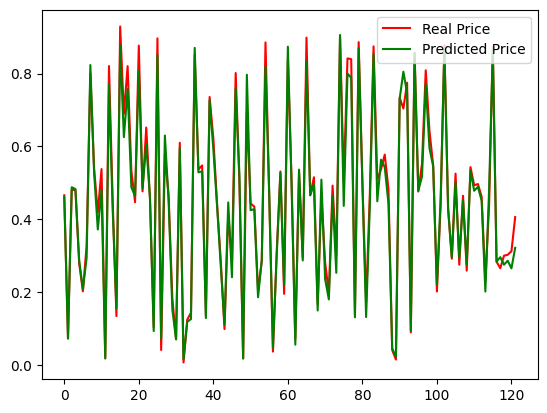

In [9]:
import matplotlib.pyplot as plt

plt.plot(y_test, color="red", label="Real Price")
plt.plot(y_pred, color="green", label="Predicted Price")
plt.legend()